# Homework  
Data documentation: https://tidyr.tidyverse.org/reference/who.html

__Directions:__ Answer the three questions below. Create as many code/markdown blocks necessary to answer the questions. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/who.csv')

In [2]:
#head of the data set to understand rows and column
df.head()

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#dropping  columns
df = df.drop(columns=['iso2', 'iso3'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   year          7240 non-null   int64  
 2   new_sp_m014   3173 non-null   float64
 3   new_sp_m1524  3209 non-null   float64
 4   new_sp_m2534  3206 non-null   float64
 5   new_sp_m3544  3219 non-null   float64
 6   new_sp_m4554  3223 non-null   float64
 7   new_sp_m5564  3218 non-null   float64
 8   new_sp_m65    3209 non-null   float64
 9   new_sp_f014   3174 non-null   float64
 10  new_sp_f1524  3194 non-null   float64
 11  new_sp_f2534  3200 non-null   float64
 12  new_sp_f3544  3199 non-null   float64
 13  new_sp_f4554  3204 non-null   float64
 14  new_sp_f5564  3195 non-null   float64
 15  new_sp_f65    3197 non-null   float64
 16  new_sn_m014   1045 non-null   float64
 17  new_sn_m1524  1030 non-null   float64
 18  new_sn_m2534  1022 non-null 

## Question 1. We need to know what's included in this data.
- How many countries are present?  
- What's the timespan of the data?  
- Does each country have a row for every year present?  
- Which countries are missing years?  
- How many rows have at least 1 non-null values across the columns 3-57?

In [4]:
#printing the total unique number of countries
CountCountries = df['country'].nunique()
print(CountCountries)

219


In [5]:
#names of unique countries 
NamesOfCountries = df['country'].unique()
print(NamesOfCountries)


['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bonaire, Saint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'China, Hong Kong SAR'
 'China, Macao SAR' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus'
 'Czech Republic' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Fr

In [6]:
#calculating the timespan by doing the max year - min year - +1 to take the first value in consideration
timespan=df['year'].max()-df['year'].min()+1
print(f"The timespan of data",timespan)

The timespan of data 34


In [7]:
#Does each country have a row for every year present?
#grouping by country and calcuating years.
countrywise=df.groupby('country')['year'].nunique()
if (countrywise != timespan).any():
    print("Some countries do not have data for every year.")
else:
    print("All countries have data for every year.")

Some countries do not have data for every year.


In [8]:
#checking which countries have missing year data. Comparing it with the standard calculated time frame and returning 
missing_years_countries = countrywise[countrywise < timespan]
if missing_years_countries.empty:
    print("All countries have data for every year.")
else:
    missing_countries = missing_years_countries.index.tolist()
    print(f"Countries missing data for some years:\n{missing_countries}")
    

Countries missing data for some years:
['Bonaire, Saint Eustatius and Saba', 'Curacao', 'Montenegro', 'Netherlands Antilles', 'Serbia', 'Serbia & Montenegro', 'Sint Maarten (Dutch part)', 'South Sudan', 'Timor-Leste']


In [9]:
#How many rows have at least 1 non-null values across the columns 3-57?
#confirming indexes as python has 0 index system so to get from 3 -57 using 2-57 
starting_column_name = df.columns[2]
ending_column_name = df.columns[57]
print(starting_column_name,ending_column_name)
#  columns 3 to 57 (which are from index 2 to 56 in Python 0-based indexing)
subset_columns = df.iloc[:, 2:57]
non_null_rows_count = subset_columns.notnull().any(axis=1).sum()
print(f"Number of rows with at least 1 non-null value in columns 3 to 57: {non_null_rows_count}")


new_sp_m014 newrel_f65
Number of rows with at least 1 non-null value in columns 3 to 57: 3483


## Question 2: Wide data isn't usually helpful.
Convert this to a long format with the following columns:  
1. country  
2. year  
3. diagnosis method: mapping should be: 

```
  {'newsp':'Pulmonary Smear (+)'
  ,'newsn':'Pulmonary Smear (-)'
  ,'newep':'Extrapulmonary'
  ,'newrel':'Relapse'}   
 ```

4. gender: male or female.   
5. age: lower_age - higher_age, e.g., 0-14  
6. number of cases  

__Note__: You can use `replace` (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

In [10]:
# dfLong dataframe representing long format
dfLong = pd.melt(df, 
                  id_vars=['country', 'year'], 
                  value_vars=[
                      'new_sp_m014', 'new_sp_m1524', 'new_sp_m2534', 'new_sp_m3544', 
                      'new_sp_m4554', 'new_sp_m5564', 'new_sp_m65', 'new_sp_f014', 
                      'new_sp_f1524', 'new_sp_f2534', 'new_sp_f3544', 'new_sp_f4554', 
                      'new_sp_f5564', 'new_sp_f65', 'new_sn_m014', 'new_sn_m1524', 
                      'new_sn_m2534', 'new_sn_m3544', 'new_sn_m4554', 'new_sn_m5564', 
                      'new_sn_m65', 'new_sn_f014', 'new_sn_f1524', 'new_sn_f2534', 
                      'new_sn_f3544', 'new_sn_f4554', 'new_sn_f5564', 'new_sn_f65', 
                      'new_ep_m014', 'new_ep_m1524', 'new_ep_m2534', 'new_ep_m3544', 
                      'new_ep_m4554', 'new_ep_m5564', 'new_ep_m65', 'new_ep_f014', 
                      'new_ep_f1524', 'new_ep_f2534', 'new_ep_f3544', 'new_ep_f4554', 
                      'new_ep_f5564', 'new_ep_f65', 'newrel_m014', 'newrel_m1524', 
                      'newrel_m2534', 'newrel_m3544', 'newrel_m4554', 'newrel_m5564', 
                      'newrel_m65', 'newrel_f014', 'newrel_f1524', 'newrel_f2534', 
                      'newrel_f3544', 'newrel_f4554', 'newrel_f5564', 'newrel_f65'
                  ],
                  var_name='diagnosis', 
                  value_name='number_of_cases')

print(dfLong)

            country  year    diagnosis  number_of_cases
0       Afghanistan  1980  new_sp_m014              NaN
1       Afghanistan  1981  new_sp_m014              NaN
2       Afghanistan  1982  new_sp_m014              NaN
3       Afghanistan  1983  new_sp_m014              NaN
4       Afghanistan  1984  new_sp_m014              NaN
...             ...   ...          ...              ...
405435     Zimbabwe  2009   newrel_f65              NaN
405436     Zimbabwe  2010   newrel_f65              NaN
405437     Zimbabwe  2011   newrel_f65              NaN
405438     Zimbabwe  2012   newrel_f65              NaN
405439     Zimbabwe  2013   newrel_f65            725.0

[405440 rows x 4 columns]


In [11]:
#Diagnosis method mapping. Extracting string from diagnosis and Using a dictionary to match the key with value

diagnosis_map = {
    'new_sp': 'Pulmonary Smear (+)',
    'new_sn': 'Pulmonary Smear (-)',
    'new_ep': 'Extrapulmonary',
    'newrel': 'Relapse'
}


dfLong[['diagnosis_method', 'gender']] = dfLong['diagnosis'].str.extract(r'^(new\w+)_(m|f)')
dfLong['diagnosis_method'] = dfLong['diagnosis_method'].replace(diagnosis_map)
dfLong.sample()

,country,year,diagnosis,number_of_cases,diagnosis_method,gender
290621,Brunei Darussalam,2011,new_ep_f5564,1.0,Extrapulmonary,f


In [12]:
#replacing gender letters by Male and Female
dfLong['gender'] = dfLong['gender'].replace({'m': 'Male', 'f': 'Female'})
dfLong.sample()

,country,year,diagnosis,number_of_cases,diagnosis_method,gender
221364,Monaco,1988,new_ep_m2534,NaN,Extrapulmonary,Male


In [13]:
#using a function to convert the age ranges based on length to readable normal readings 

dfLong['age_group'] = dfLong['diagnosis'].str.extract(r'(\d+)$')
def convert_age_group(age_str):
    # Handling two-digit's '65 = 65+'
    if len(age_str) == 2 and age_str.isdigit():
        return f"{age_str}+"
    
    # Handling 3-digit age ranges like '014 =0-14'
    elif len(age_str) == 3 and age_str.isdigit():
        higher_age = int(age_str[1:]) 
        return f" 0-{higher_age}"
    
    # Handling 4-digit ages like '1524 = 15=15-24'
    elif len(age_str) == 4 and age_str.isdigit():
        lower_age = int(age_str[:2])  
        higher_age = int(age_str[2:]) 
        return f"{lower_age}-{higher_age}"
    return age_str
dfLong['age_group'] = dfLong['age_group'].apply(lambda x: convert_age_group(str(x)))

dfLong.sample(10)

,country,year,diagnosis,number_of_cases,diagnosis_method,gender,age_group
149137,Myanmar,1982,new_sn_m65,NaN,Pulmonary Smear (-),Male,65+
105871,Netherlands Antilles,1986,new_sn_m014,NaN,Pulmonary Smear (-),Male,0-14
41263,Philippines,1998,new_sp_m5564,206.0,Pulmonary Smear (+),Male,55-64
224386,Zambia,1994,new_ep_m2534,NaN,Extrapulmonary,Male,25-34
141826,Montserrat,2013,new_sn_m5564,NaN,Pulmonary Smear (-),Male,55-64
174129,Aruba,2009,new_sn_f3544,NaN,Pulmonary Smear (-),Female,35-44
13297,Sudan,1999,new_sp_m1524,1100.0,Pulmonary Smear (+),Male,15-24
158644,Turks and Caicos Islands,1990,new_sn_f014,NaN,Pulmonary Smear (-),Female,0-14
257178,Luxembourg,2010,new_ep_f014,0.0,Extrapulmonary,Female,0-14
272381,Netherlands,2010,new_ep_f2534,50.0,Extrapulmonary,Female,25-34


In [14]:
#Removing diagnosis column and getting the rest in order
dfLong = dfLong[['country', 'year', 'diagnosis_method','gender', 'age_group', 'number_of_cases' ]]
dfLong.sample(10)

,country,year,diagnosis_method,gender,age_group,number_of_cases
253965,Bangladesh,2001,Extrapulmonary,Female,0-14,NaN
40987,Norway,1994,Pulmonary Smear (+),Male,55-64,NaN
31926,Iceland,1980,Pulmonary Smear (+),Male,45-54,NaN
28030,The Former Yugoslav Republic of Macedonia,1980,Pulmonary Smear (+),Male,35-44,NaN
13354,Swaziland,1988,Pulmonary Smear (+),Male,15-24,NaN
342699,French Polynesia,2011,Relapse,Male,55-64,NaN
365402,Kenya,2008,Relapse,Female,15-24,NaN
113257,Niger,2000,Pulmonary Smear (-),Male,15-24,NaN
344263,Malta,2011,Relapse,Male,55-64,NaN
165628,Timor-Leste,2006,Pulmonary Smear (-),Female,15-24,NaN


## Question 3: Create a graph that shows when countries started to report TB cases.

In [15]:
# Filtering cases where there were cases i.e Non zero
dfLong_casesNonZero = dfLong[dfLong['number_of_cases'] > 0]

# Grouping by country and finding the min year to use as the first reported year
dfLong_Minyear = dfLong_casesNonZero.groupby('country')['year'].min().reset_index()

# Renaming the columns
dfLong_Minyear.columns = ['country', 'first_reporting_year']

print(dfLong_Minyear)


                       country  first_reporting_year
0                  Afghanistan                  1997
1                      Albania                  1995
2                      Algeria                  1997
3               American Samoa                  1997
4                      Andorra                  1996
..                         ...                   ...
212  Wallis and Futuna Islands                  1996
213   West Bank and Gaza Strip                  1995
214                      Yemen                  1995
215                     Zambia                  1995
216                   Zimbabwe                  2002

[217 rows x 2 columns]


In [16]:
# Sorting the data
df_first_reported_sorted = dfLong_Minyear.sort_values(by='country')

# Splitting the data into groups of 50 countries each
df_first_100 = df_first_reported_sorted.iloc[:50] #afghanistan - Cote d'Ivoire
df_second = df_first_reported_sorted.iloc[50:100] #Croatia - Kazhkhstan
df_third = df_first_reported_sorted.iloc[100:150] #Kenya - Peru
df_fourth = df_first_reported_sorted.iloc[150:220]  #Phillipines to Zimbawe

# min and max year to adjust the x-axis
min_year = df_first_reported_sorted['first_reporting_year'].min()
max_year = df_first_reported_sorted['first_reporting_year'].max()

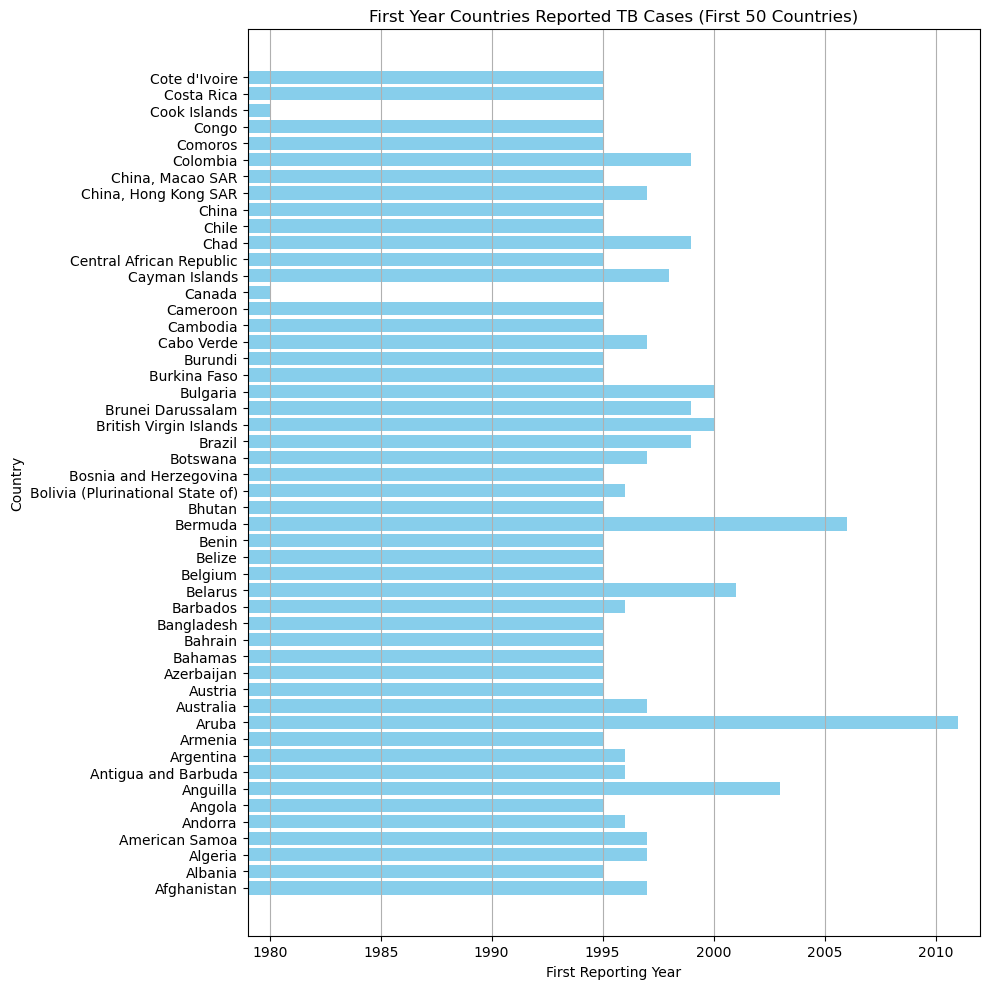

In [17]:
# Plot 1: First 50 countries
plt.figure(figsize=(10, 10))
plt.barh(df_first_100['country'], df_first_100['first_reporting_year'], color='skyblue')
plt.xlabel('First Reporting Year')
plt.ylabel('Country')
plt.title('First Year Countries Reported TB Cases (First 50 Countries)')
plt.xlim(min_year - 1, max_year + 1)
plt.grid(axis='x')
plt.tight_layout()  
plt.show()



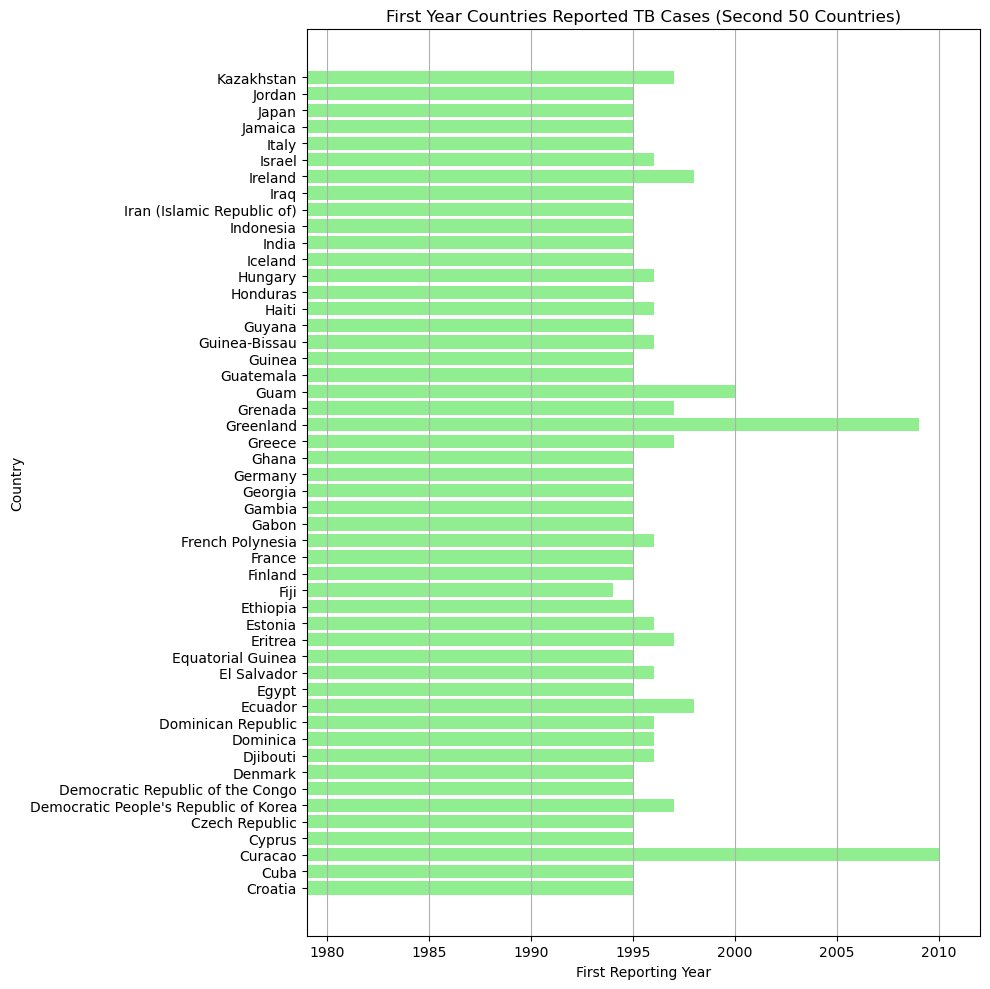

In [18]:
# Plot 2: Second 50 countries
plt.figure(figsize=(10, 10))  
plt.barh(df_second['country'], df_second['first_reporting_year'], color='lightgreen')
plt.xlabel('First Reporting Year')
plt.ylabel('Country')
plt.title('First Year Countries Reported TB Cases (Second 50 Countries)')
plt.xlim(min_year - 1, max_year + 1)
plt.grid(axis='x')
plt.tight_layout()  
plt.show()


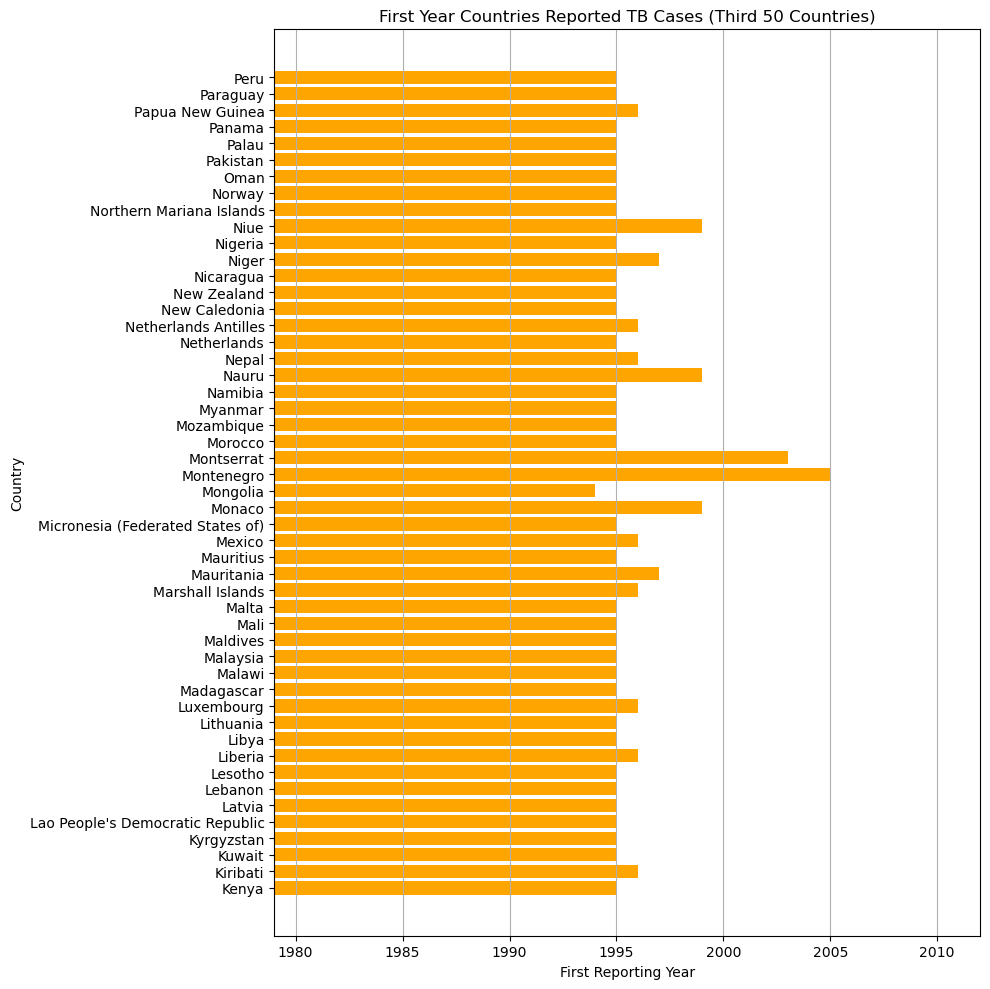

In [19]:
# Plot 3: Third 50 countries
plt.figure(figsize=(10, 10))  
plt.barh(df_third['country'], df_third['first_reporting_year'], color='orange')
plt.xlabel('First Reporting Year')
plt.ylabel('Country')
plt.title('First Year Countries Reported TB Cases (Third 50 Countries)')
plt.xlim(min_year - 1, max_year + 1)
plt.grid(axis='x')
plt.tight_layout() 
plt.show()


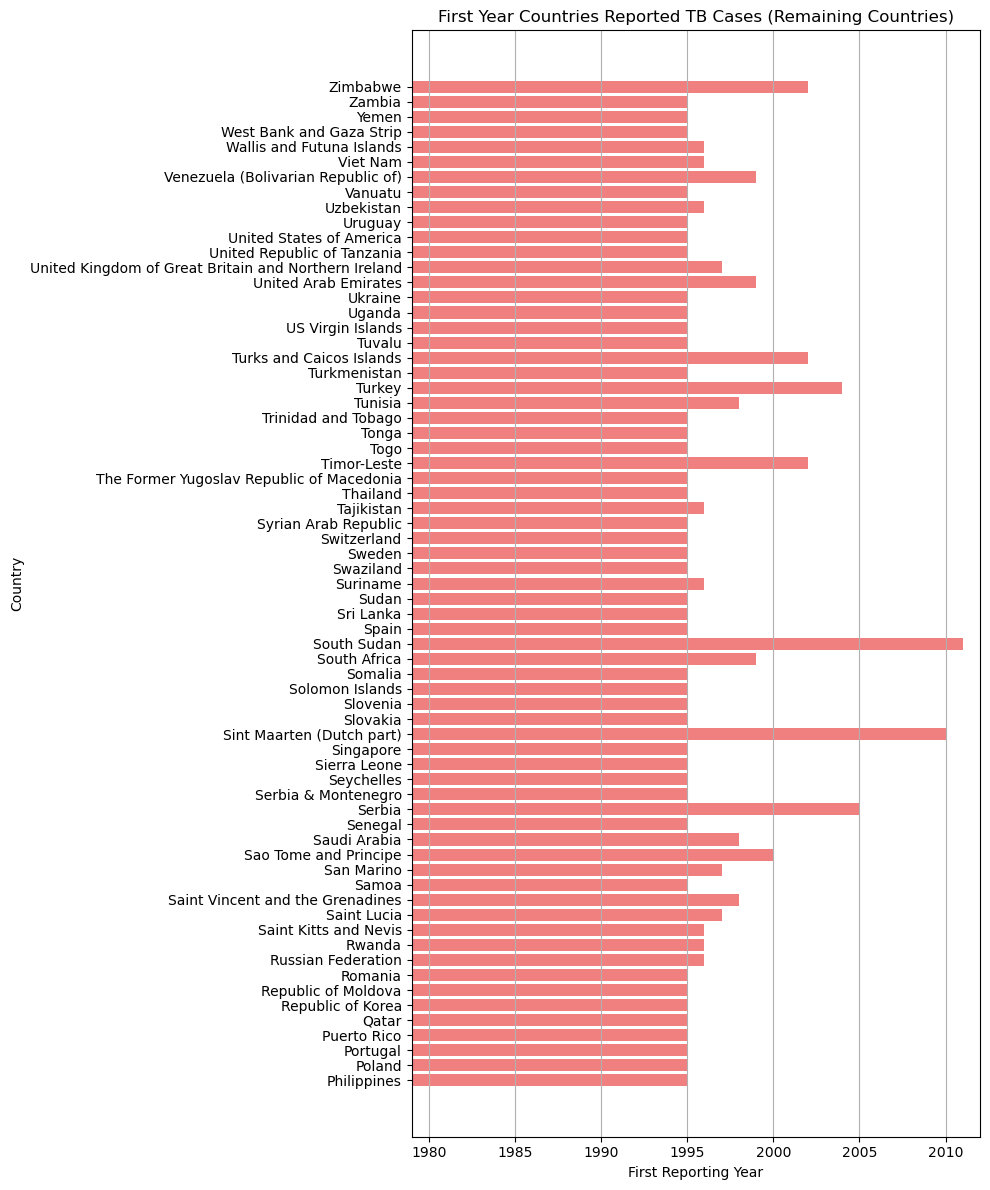

In [20]:

# Plot 4: up to 220
plt.figure(figsize=(10, 12))
plt.barh(df_fourth['country'], df_fourth['first_reporting_year'], color='lightcoral')
plt.xlabel('First Reporting Year')
plt.ylabel('Country')
plt.title('First Year Countries Reported TB Cases (Remaining Countries)')
plt.xlim(min_year - 1, max_year + 1)
plt.grid(axis='x')
plt.tight_layout()  
plt.show()

The above charts show when each country reported their first case 

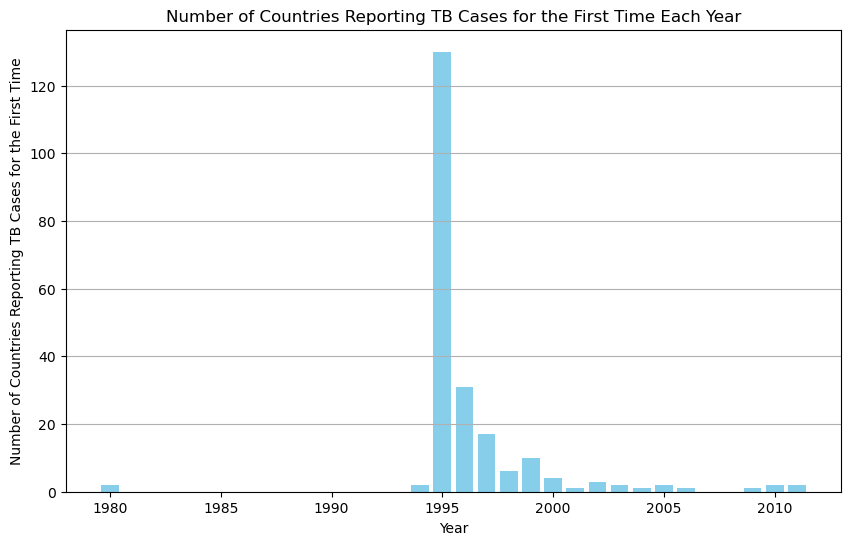

In [21]:
#counting the number of first year occurrences. 
df_yearly_reporting = dfLong_Minyear.groupby('first_reporting_year').size().reset_index(name='num_countries')
#plotting the years count 
plt.figure(figsize=(10, 6))
plt.bar(df_yearly_reporting['first_reporting_year'], df_yearly_reporting['num_countries'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Countries Reporting TB Cases for the First Time')
plt.title('Number of Countries Reporting TB Cases for the First Time Each Year')
plt.grid(axis='y')

# Display the plot
plt.show()

This shows that most of the first occurrences we reported in 1995